In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [5]:
digits.target.shape

(1797,)

In [6]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [7]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


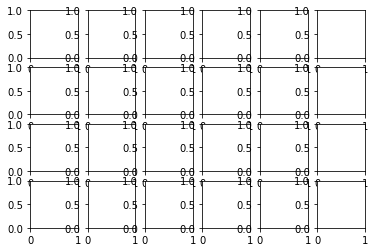

In [8]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

In [12]:
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # Удаление делений на оси x
    axes.set_yticks([]) # Удаление делений на оси y
    axes.set_title(target)
plt.tight_layout()

AttributeError: 'AxesSubplot' object has no attribute 'ravel'

In [13]:
import matplotlib.pyplot as plt

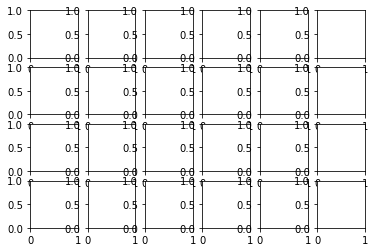

In [35]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

In [36]:
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()  

<Figure size 432x288 with 0 Axes>

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
     digits.data, digits.target, random_state=11)

In [18]:
X_train.shape

X_test.shape

(450, 64)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [20]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [21]:
predicted = knn.predict(X=X_test)

expected = y_test

predicted[:20]

expected[:20]

wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

wrong


[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

In [22]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


In [23]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

confusion


array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report

names = [str(digit) for digit in digits.target_names]

print(classification_report(expected, predicted, 
       target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



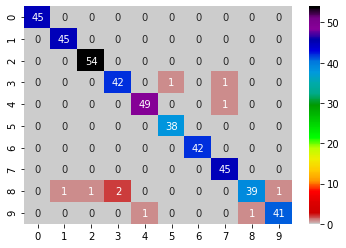

In [25]:
import pandas as pd

confusion_df = pd.DataFrame(confusion, index=range(10),
     columns=range(10))

import seaborn as sns

axes = sns.heatmap(confusion_df, annot=True, 
                    cmap='nipy_spectral_r')


In [26]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=knn, X=digits.data, 
     y=digits.target, cv=kfold)

scores

print(f'Mean accuracy: {scores.mean():.2%}')

print(f'Accuracy standard deviation: {scores.std():.2%}')

Mean accuracy: 98.78%
Accuracy standard deviation: 0.74%


In [28]:
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

estimators = {
     'KNeighborsClassifier': knn, 
     'SVC': SVC(gamma='scale'),
     'GaussianNB': GaussianNB()}

for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=digits.data, y=digits.target, cv=kfold)
     print(f'{estimator_name:>20}: ' + 
           f'mean accuracy={scores.mean():.2%}; ' +
           f'standard deviation={scores.std():.2%}')


KNeighborsClassifier: mean accuracy=98.78%; standard deviation=0.74%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


In [29]:
for k in range(1, 20, 2):
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     knn = KNeighborsClassifier(n_neighbors=k)
     scores = cross_val_score(estimator=knn, 
         X=digits.data, y=digits.target, cv=kfold)
     print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
           f'standard deviation={scores.std():.2%}')


k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.78%; standard deviation=0.74%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.83%; standard deviation=0.95%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%


In [37]:
from sklearn.datasets import fetch_california_housing

In [38]:
california = fetch_california_housing()

In [39]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [40]:
california.data.shape

(20640, 8)

In [41]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [42]:
type(california)

sklearn.utils.Bunch

In [43]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)

In [44]:
california_df['MedHouseValue'] = pd.Series(california.target)

In [45]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [46]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [49]:
len(california_df)

20640

In [50]:
sample_df = california_df.sample(frac=0.1, random_state=17)

In [51]:
import matplotlib.pyplot as plt

In [52]:
import seaborn as sns

In [53]:
sns.set(font_scale=2)

In [54]:
sns.set_style('whitegrid')

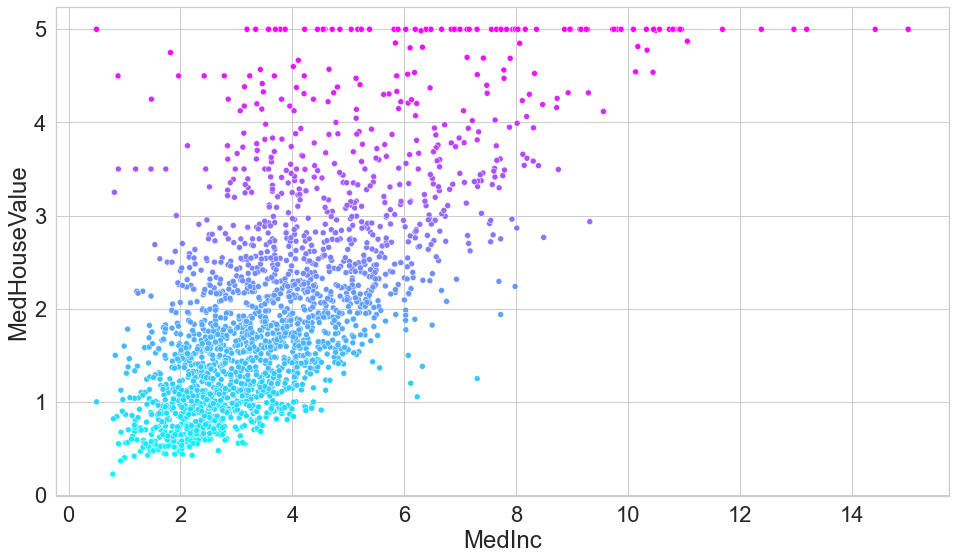

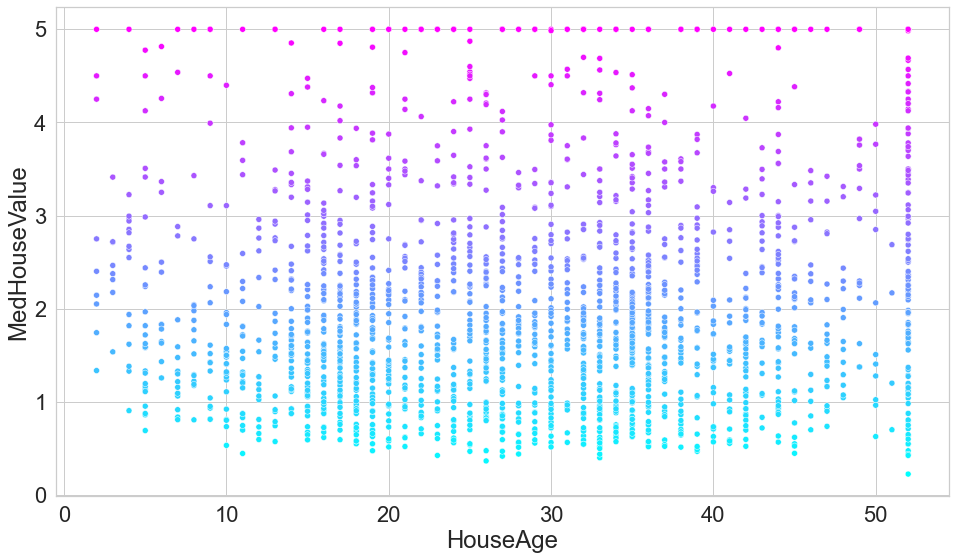

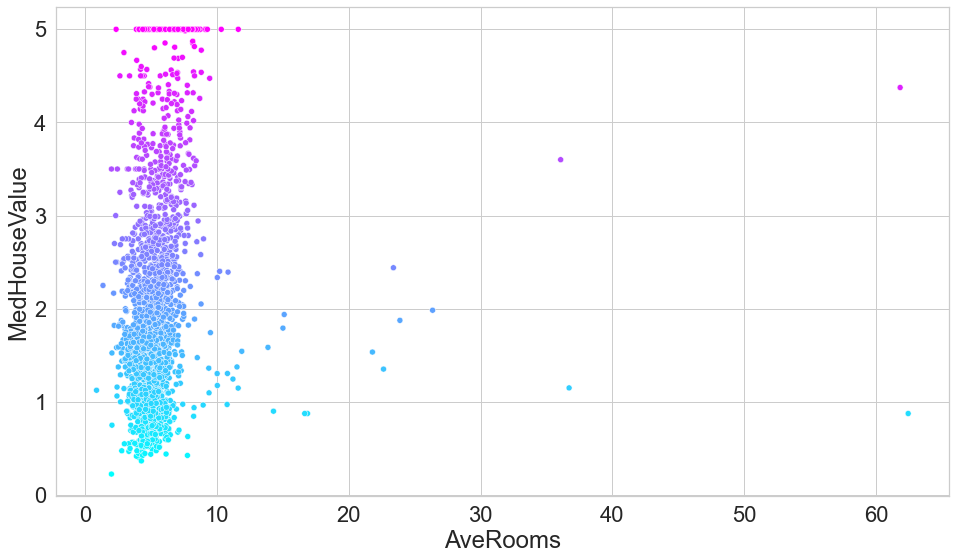

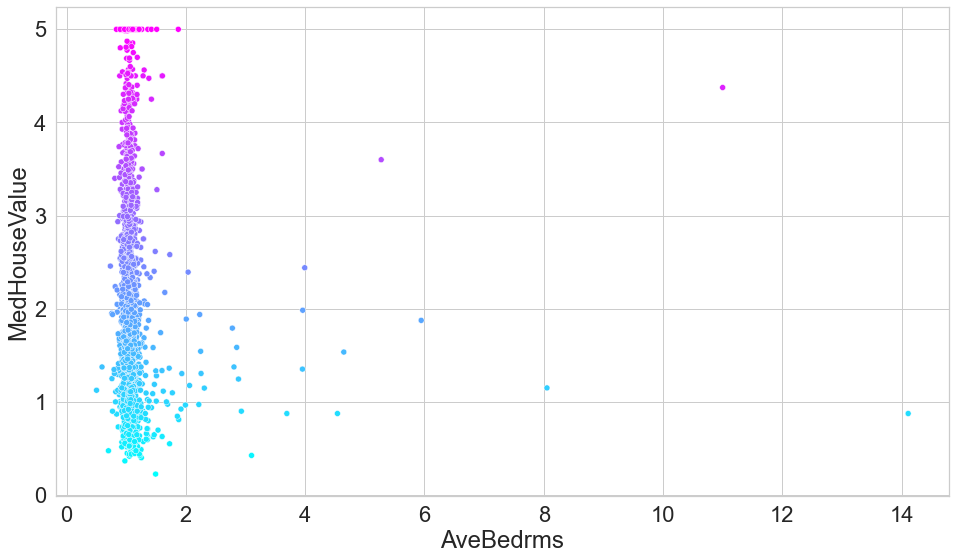

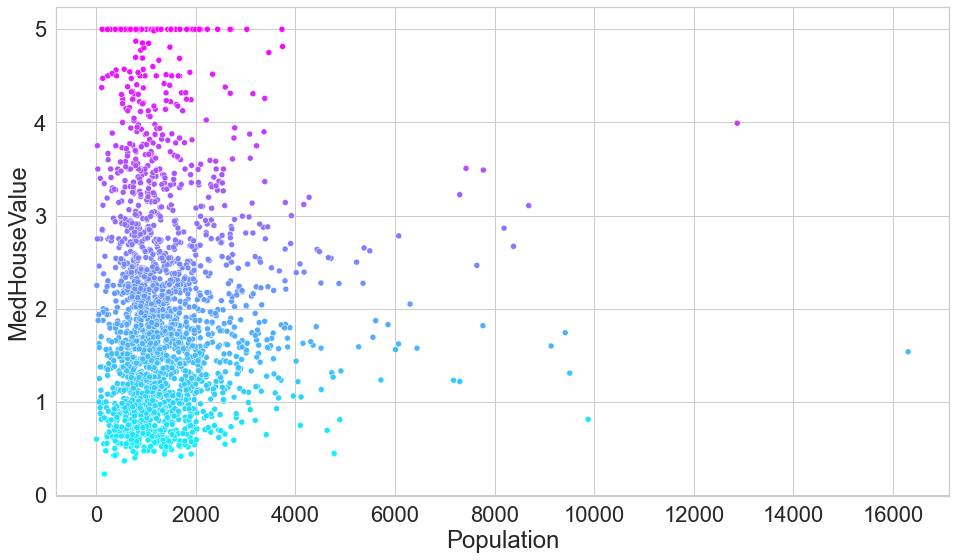

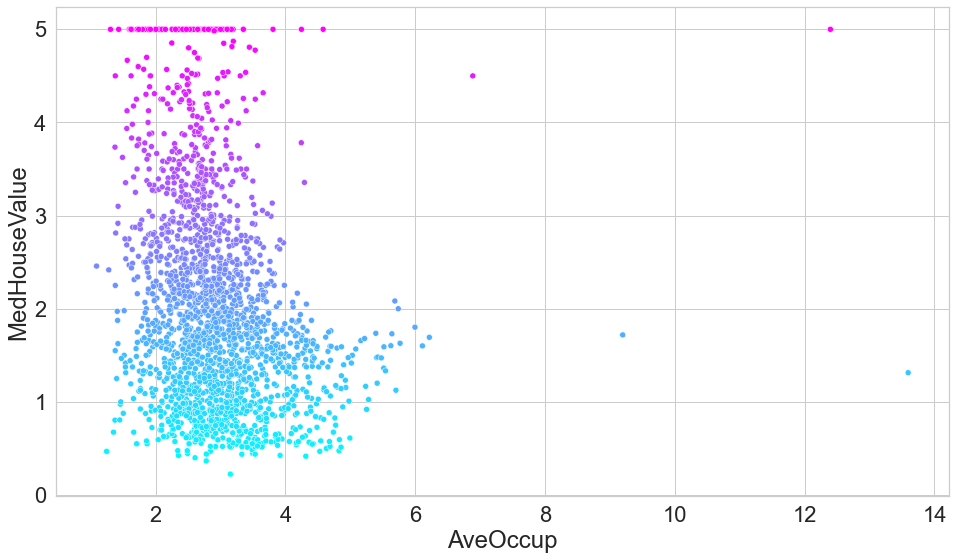

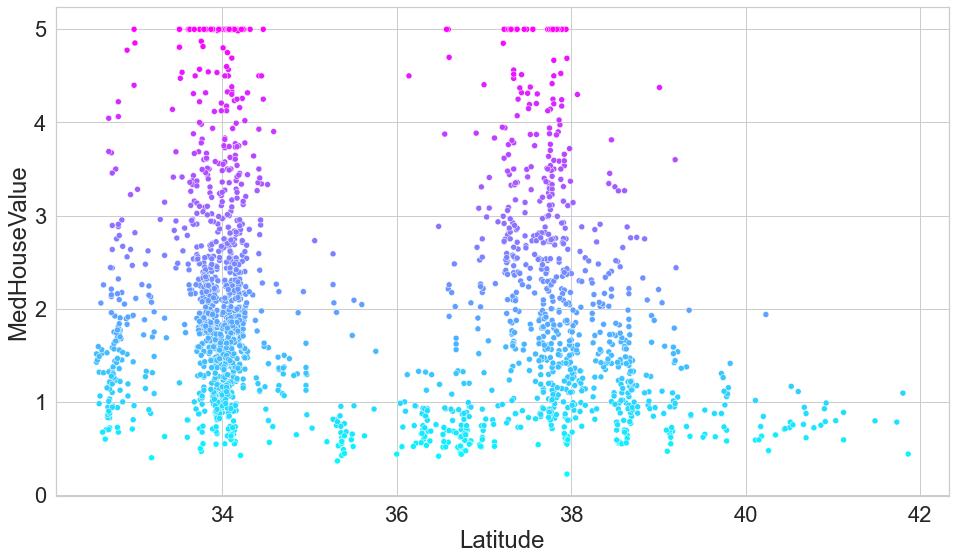

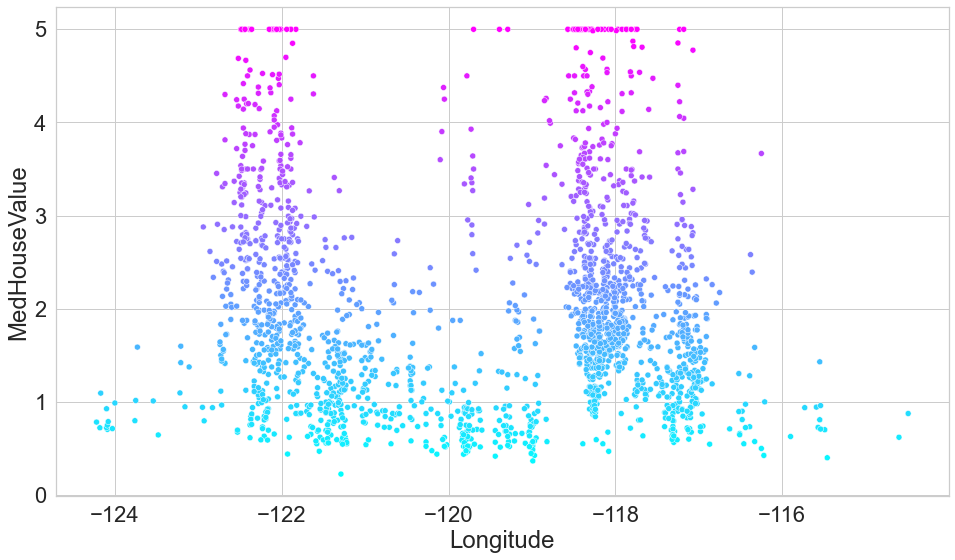

In [55]:
for feature in california.feature_names:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=sample_df, x=feature, 
                     y='MedHouseValue', hue='MedHouseValue', 
                     palette='cool', legend=False)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
linear_regression = LinearRegression()

In [58]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [59]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
normalize=False)

LinearRegression()

In [60]:
for i, name in enumerate(california.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

    MedInc: 2.6812337834570266e-16
  HouseAge: 0.08051777464658744
  AveRooms: -0.00589668862510373
 AveBedrms: -0.015895059393704926
Population: 0.0563971552642656
  AveOccup: 0.020557908971746575
  Latitude: -0.06662882847147254
 Longitude: 0.021218517070380465


In [61]:
predicted = linear_regression.predict(X_test)

In [62]:
expected = y_test

In [63]:
predicted[:5]

array([2.09109675, 4.03041586, 5.45122612, 6.5060806 , 5.34570219])

In [64]:
expected[:5]

array([0, 4, 9, 9, 3])

In [65]:
df = pd.DataFrame()

In [66]:
df['Expected'] = pd.Series(expected)

In [67]:
df['Predicted'] = pd.Series(predicted)

In [68]:
figure = plt.figure(figsize=(9, 9))

<Figure size 648x648 with 0 Axes>

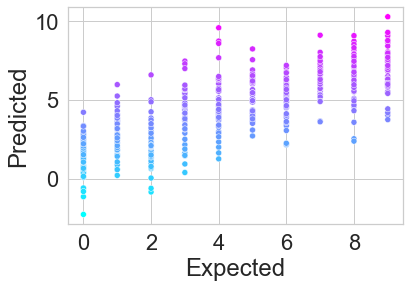

In [69]:
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
     hue='Predicted', palette='cool', legend=False)

In [70]:
start = min(expected.min(), predicted.min())

In [71]:
end = max(expected.max(), predicted.max())

In [72]:
axes.set_xlim(start, end)

(-2.276556772526315, 10.283875436312849)

In [73]:
axes.set_ylim(start, end)

(-2.276556772526315, 10.283875436312849)

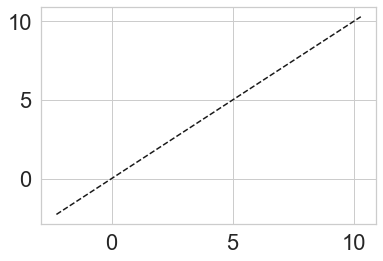

In [74]:
line = plt.plot([start, end], [start, end], 'k--')

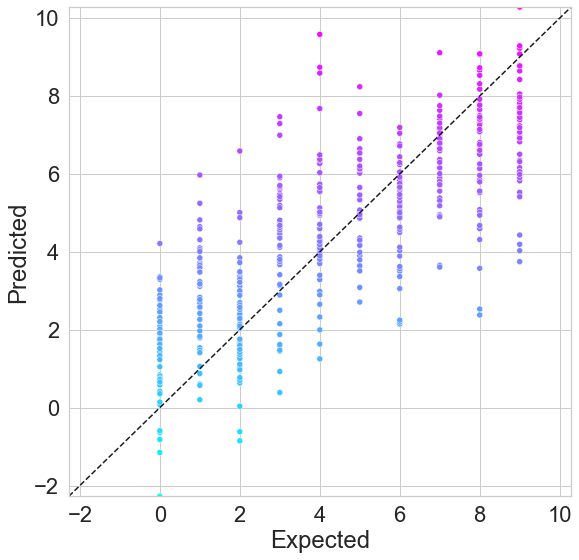

In [75]:
df = pd.DataFrame()

df['Expected'] = pd.Series(expected)

df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
     hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

In [76]:
from sklearn import metrics

In [77]:
metrics.r2_score(expected, predicted)

0.5781610937237189

In [78]:
metrics.mean_squared_error(expected, predicted)

3.4705134697694575

In [79]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [80]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [81]:
from sklearn.model_selection import KFold, cross_val_score

In [82]:
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=california.data, y=california.target, cv=kfold,
         scoring='r2')
     print(f'{estimator_name:>16}: ' + 
           f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599


In [83]:
from sklearn.datasets import load_digits

In [84]:
digits = load_digits()

In [85]:
from sklearn.manifold import TSNE

In [86]:
tsne = TSNE(n_components=2, random_state=11)

In [87]:
reduced_data = tsne.fit_transform(digits.data)

In [88]:
reduced_data.shape

(1797, 2)

In [89]:
import matplotlib.pyplot as plt

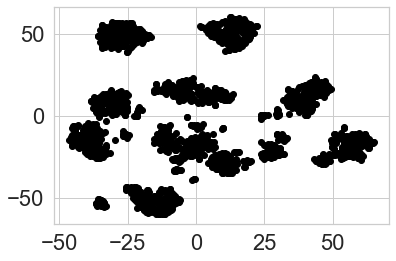

In [90]:
dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
                    c='black')

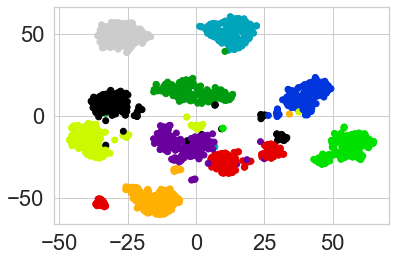

In [91]:
dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
     c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

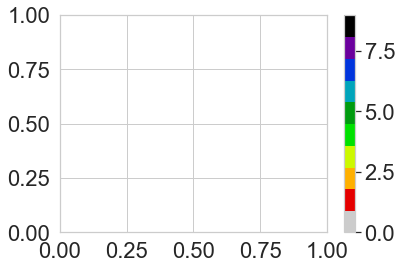

In [92]:
colorbar = plt.colorbar(dots)

In [93]:
from sklearn.datasets import load_iris

In [94]:
iris = load_iris()

In [95]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [96]:
iris.data.shape

(150, 4)

In [97]:
iris.target.shape

(150,)

In [98]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [99]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [100]:
import pandas as pd

In [101]:
pd.set_option('max_columns', 5)

In [102]:
pd.set_option('display.width', None)

In [103]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [104]:
iris_df['species'] = [iris.target_names[i] for i in iris.target]

In [105]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [106]:
pd.set_option('precision', 2)

In [107]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [108]:
iris_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

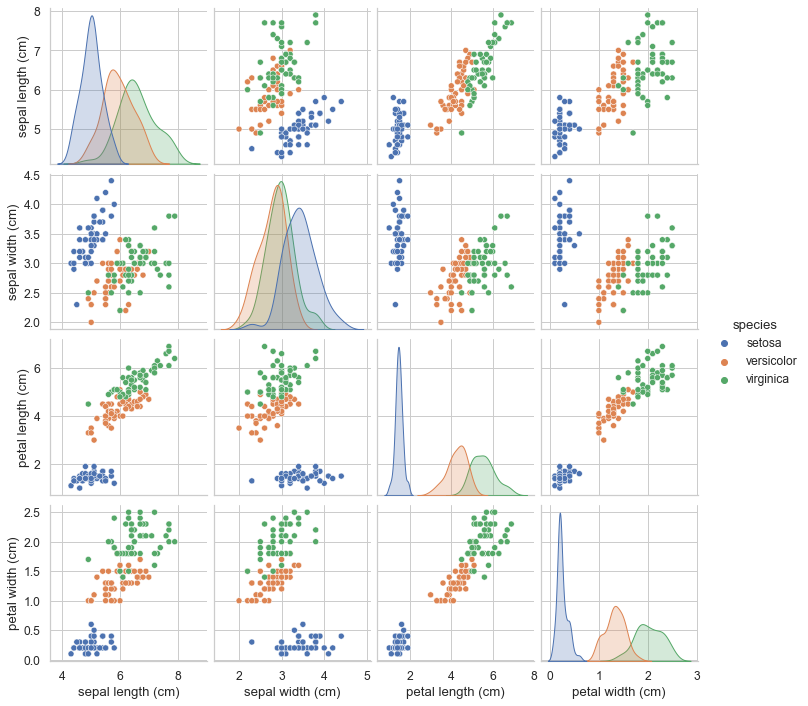

In [111]:
import seaborn as sns

sns.set(font_scale=1.1)

sns.set_style('whitegrid')

grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4],
     hue='species')

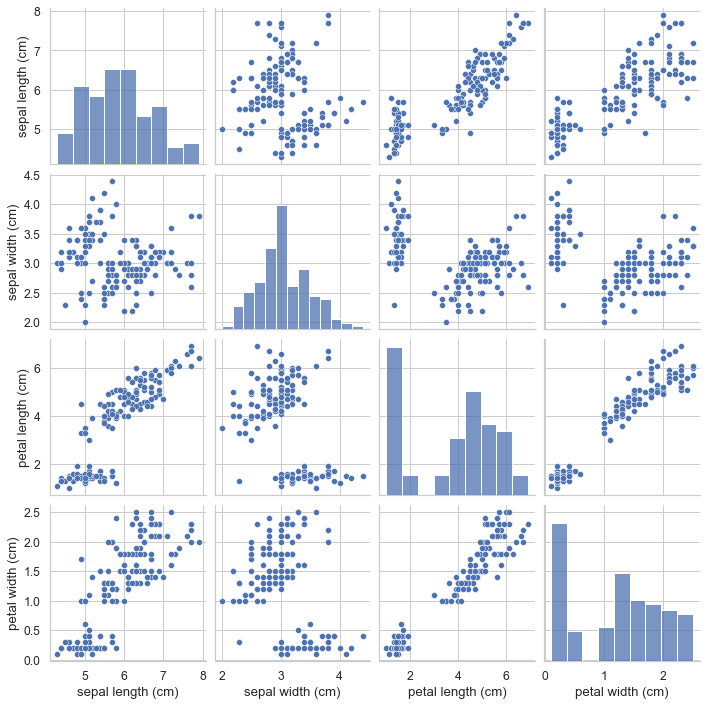

In [112]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4])

In [113]:
from sklearn.cluster import KMeans

In [114]:
kmeans = KMeans(n_clusters=3, random_state=11)

In [115]:
kmeans.fit(iris.data)

KMeans(n_clusters=3, random_state=11)

In [116]:
print(kmeans.labels_[0:50])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [117]:
print(kmeans.labels_[50:100])

[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [118]:
print(kmeans.labels_[100:150])

[2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0]


In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=11)


In [123]:
pca.fit(iris.data)

iris_pca = pca.transform(iris.data)

iris_pca.shape

(150, 2)

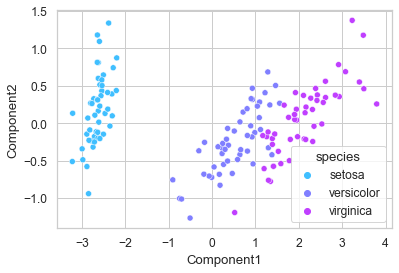

In [124]:
iris_pca_df = pd.DataFrame(iris_pca, 
                            columns=['Component1', 'Component2'])

iris_pca_df['species'] = iris_df.species

axes = sns.scatterplot(data=iris_pca_df, x='Component1', 
     y='Component2', hue='species', legend='brief', 
     palette='cool')

iris_centers = pca.transform(kmeans.cluster_centers_)

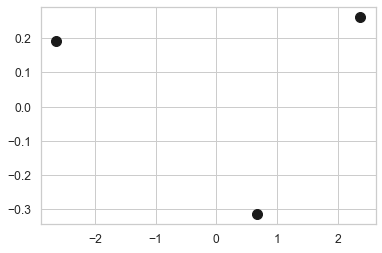

In [125]:
import matplotlib.pyplot as plt

dots = plt.scatter(iris_centers[:,0], iris_centers[:,1], 
                    s=100, c='k')

In [126]:
from sklearn.cluster import DBSCAN, MeanShift,\
     SpectralClustering, AgglomerativeClustering

estimators = {
    'KMeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AgglomerativeClustering': 
        AgglomerativeClustering(n_clusters=3)
}

import numpy as np

for name, estimator in estimators.items():
     estimator.fit(iris.data)
     print(f'\n{name}:')
     for i in range(0, 101, 50):
         labels, counts = np.unique(
             estimator.labels_[i:i+50], return_counts=True)
         print(f'{i}-{i+50}:')
         for label, count in zip(labels, counts):
             print(f'   label={label}, count={count}')
             


KMeans:
0-50:
   label=1, count=50
50-100:
   label=0, count=48
   label=2, count=2
100-150:
   label=0, count=14
   label=2, count=36

DBSCAN:
0-50:
   label=-1, count=1
   label=0, count=49
50-100:
   label=-1, count=6
   label=1, count=44
100-150:
   label=-1, count=10
   label=1, count=40

MeanShift:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=1, count=1
100-150:
   label=0, count=50

SpectralClustering:
0-50:
   label=1, count=50
50-100:
   label=0, count=50
100-150:
   label=0, count=15
   label=2, count=35

AgglomerativeClustering:
0-50:
   label=1, count=50
50-100:
   label=0, count=49
   label=2, count=1
100-150:
   label=0, count=15
   label=2, count=35
